# Chapter 9 - Recap

This chapter was about advanced methods to sample from the posterior. The methods discussed were:

* Gibbs Sampling
* Metropolis Algorithm
* Hamiltonian Monte Carlo (HMC)

In [25]:
library(rethinking)

In [26]:
data(rugged)
d <- rugged
d$log_gdp <- log(d$rgdppc_2000)
dd <- d[complete.cases(d$rgdppc_2000), ]
dd$log_gdp_std <- dd$log_gdp/mean(dd$log_gdp)
dd$rugged_std <- dd$rugged/mean(dd$rugged)
dd$cid <- ifelse(dd$cont_africa ==1, 1, 2)

### quadratic approximation

In [27]:
m8.3 <- quap(
    alist(
        log_gdp_std ~ dnorm(mu, sigma),
        mu <- a[cid] + b[cid]*(rugged_std - 0.215),
        a[cid] ~ dnorm(1, 0.1),
        b[cid] ~ dnorm(0, 0.3),
        sigma ~ dexp(1)
    ), data=dd
)
precis(m8.3, depth=2)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a[1],0.86533402,0.018339745,0.836023562,0.89464447
a[2],1.07452091,0.014111944,1.051967299,1.09707452
b[1],0.02748681,0.016364244,0.001333585,0.05364003
b[2],-0.03079360,0.011900433,-0.049812794,-0.01177441
sigma,0.10950257,0.005936644,0.100014666,0.11899047


### hamiltonian monte carlo

Creating a list as input

In [28]:
dat_slim <- list(
    log_gdp_std = dd$log_gdp_std,
    rugged_std = dd$rugged_std,
    cid=as.integer(dd$cid)
)
str(dat_slim)

List of 3
 $ log_gdp_std: num [1:170] 0.88 0.965 1.166 1.104 0.915 ...
 $ rugged_std : num [1:170] 0.644 2.571 0.577 0.581 2.016 ...
 $ cid        : int [1:170] 1 2 2 2 2 2 2 2 2 1 ...


sampling from the posterior

In [29]:
m9.1 <- ulam(
    alist(
        log_gdp_std ~ dnorm(mu, sigma),
        mu <- a[cid] + b[cid] * (rugged_std - 0.215),
        a[cid] ~ dnorm(1, 0.1),
        b[cid] ~ dnorm(0, 0.3),
        sigma ~ dexp(1)
    ), data=dat_slim, chains=4, cores=4
)

recompiling to avoid crashing R session



In [30]:
precis(m9.1, depth=2)

,mean,sd,5.5%,94.5%,n_eff,Rhat4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a[1],0.86565011,0.018281538,0.837323167,0.89563372,1488.638,1.0003348
a[2],1.07444797,0.014289787,1.050214303,1.09655403,1226.065,1.0004496
b[1],0.02727058,0.016277521,0.001517547,0.05319300,1492.660,0.9994349
b[2],-0.03077369,0.011961255,-0.050085401,-0.01163563,1345.233,0.9994269
sigma,0.11162267,0.006188295,0.102346781,0.12218724,1839.803,0.9985248


In [31]:
show(m9.1)

Hamiltonian Monte Carlo approximation
2000 samples from 4 chains

Sampling durations (seconds):
        warmup sample total
chain:1   0.16   0.12  0.27
chain:2   0.16   0.12  0.28
chain:3   0.13   0.12  0.25
chain:4   0.15   0.11  0.26

Formula:
log_gdp_std ~ dnorm(mu, sigma)
mu <- a[cid] + b[cid] * (rugged_std - 0.215)
a[cid] ~ dnorm(1, 0.1)
b[cid] ~ dnorm(0, 0.3)
sigma ~ dexp(1)


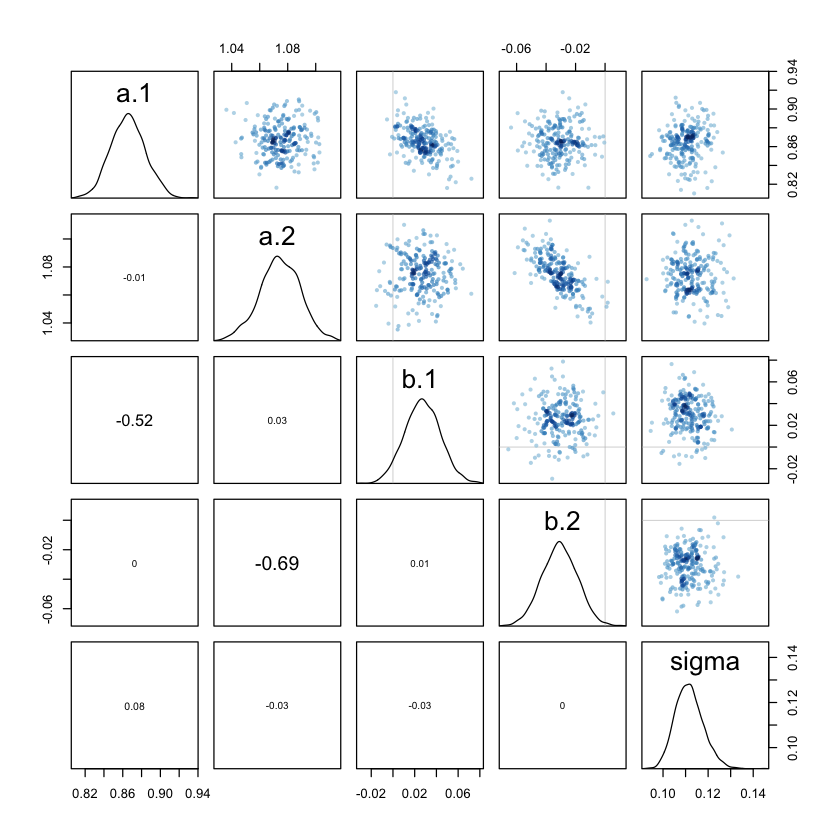

In [32]:
pairs(m9.1)

[1] 1000
[1] 1
[1] 1000


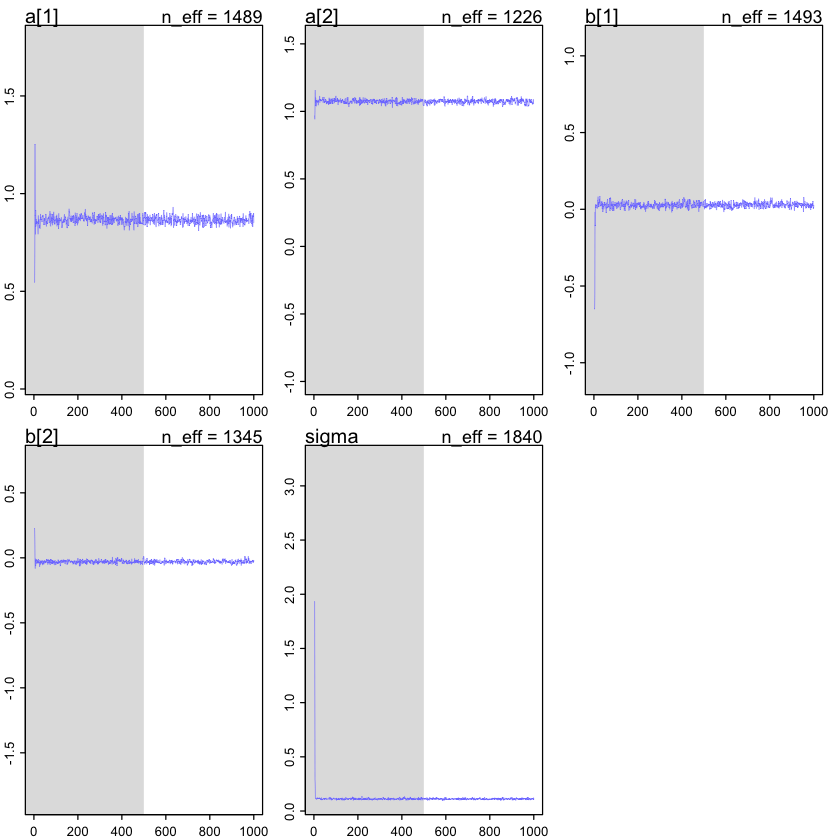

In [35]:
traceplot(m9.1, chains=1)

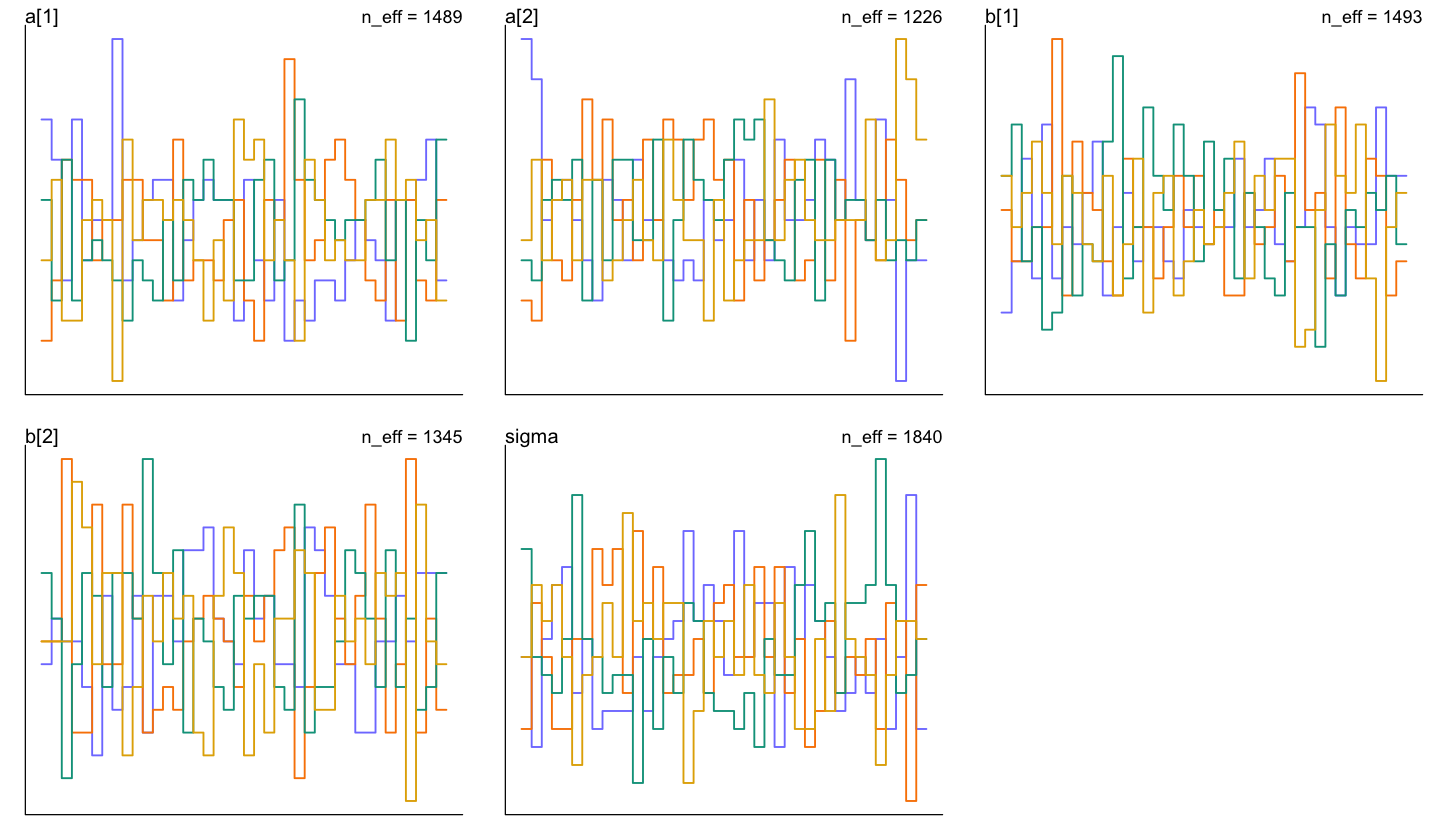

In [42]:
options(repr.plot.width=12, repr.plot.height=7)
trankplot(m9.1)

## taming wild chains

In [37]:
y <- c(-1, 1)
set.seed(11)
m9.2 <- ulam(
    alist(
        y ~ dnorm(mu, sigma),
        mu <- alpha,
        alpha ~ dnorm(0, 1000),
        sigma ~ dexp(0.0001)
    ), data=list(y=y), chains=3
)


SAMPLING FOR MODEL '726d002e27cec1633082261fcfedb813' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 1.5e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.15 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:   1 / 1000 [  0%]  (Warmup)
Chain 1: Iteration: 100 / 1000 [ 10%]  (Warmup)
Chain 1: Iteration: 200 / 1000 [ 20%]  (Warmup)
Chain 1: Iteration: 300 / 1000 [ 30%]  (Warmup)
Chain 1: Iteration: 400 / 1000 [ 40%]  (Warmup)
Chain 1: Iteration: 500 / 1000 [ 50%]  (Warmup)
Chain 1: Iteration: 501 / 1000 [ 50%]  (Sampling)
Chain 1: Iteration: 600 / 1000 [ 60%]  (Sampling)
Chain 1: Iteration: 700 / 1000 [ 70%]  (Sampling)
Chain 1: Iteration: 800 / 1000 [ 80%]  (Sampling)
Chain 1: Iteration: 900 / 1000 [ 90%]  (Sampling)
Chain 1: Iteration: 1000 / 1000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.080026 seconds (Warm-up)
Chain 1:                0.012466 seconds (Sampling)
Chain 1:   

Warning message:
“There were 82 divergent transitions after warmup. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup
to find out why this is a problem and how to eliminate them.”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”
Warning message:
“The largest R-hat is 1.07, indicating chains have not mixed.
Running the chains for more iterations may help. See
http://mc-stan.org/misc/warnings.html#r-hat”
Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
http://mc-stan.org/misc/warnings.html#bulk-ess”
Warning message:
“Tail Effective Samples Size (ESS) is too low, indicating posterior variances and tail quantiles may be unreliable.
Running the chains for more iterations may help. See
http://mc-stan.org/misc/warnings.html#tail-ess”


In [38]:
precis(m9.2)

,mean,sd,5.5%,94.5%,n_eff,Rhat4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
alpha,9.166007,345.619,-437.59025,520.9303,102.8457,1.028324
sigma,620.035602,1514.598,18.53465,2518.8874,198.5740,1.038421


[1] 1000
[1] 1
[1] 1000


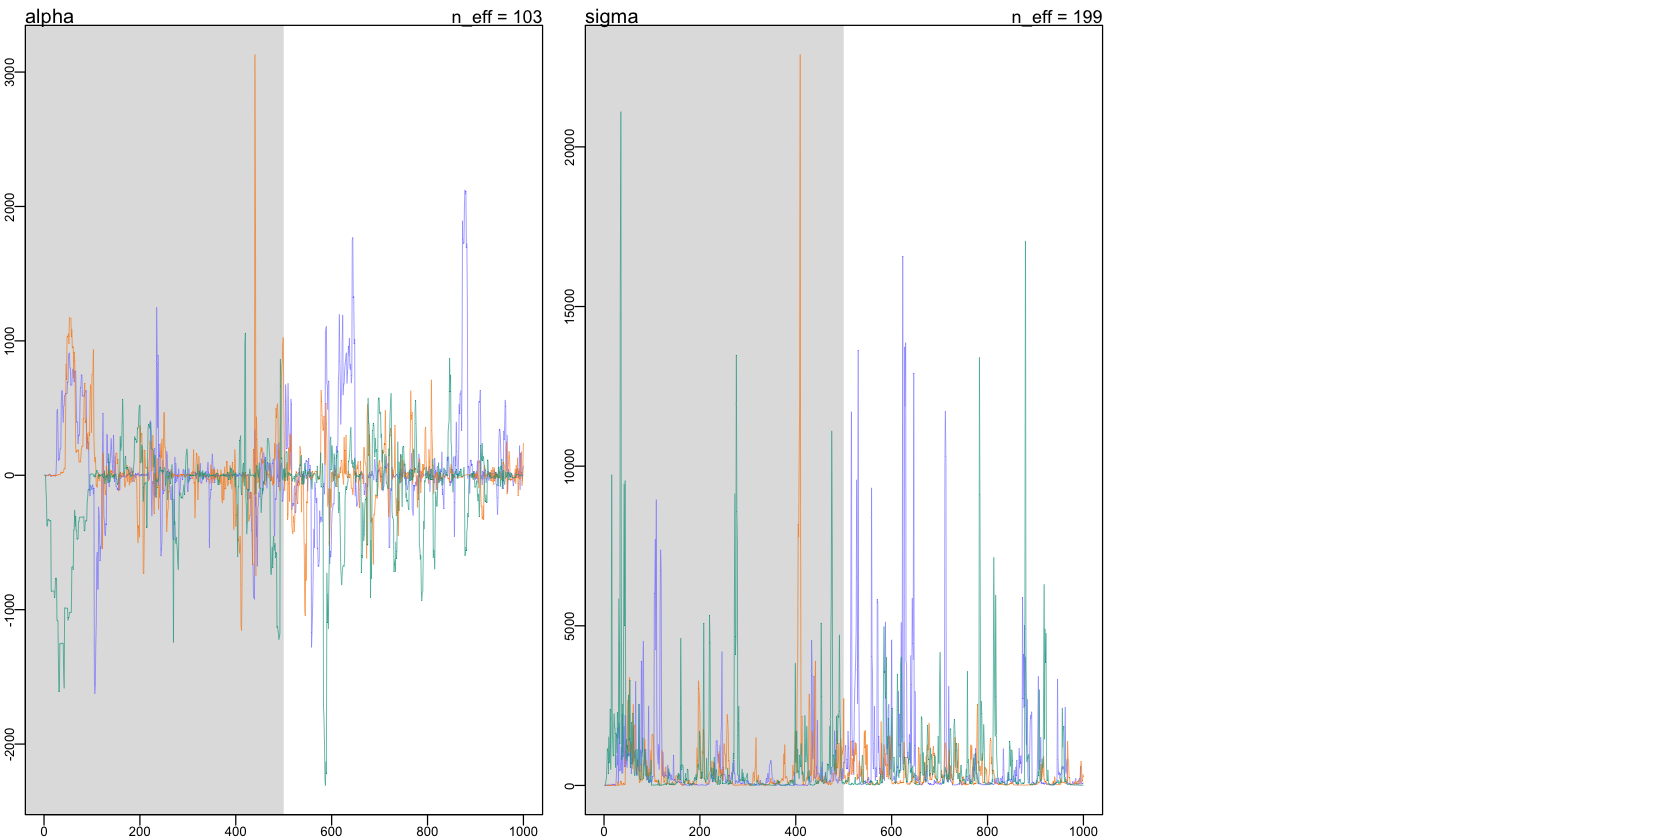

In [47]:
options(repr.plot.width=14, repr.plot.height=7)
traceplot(m9.2)

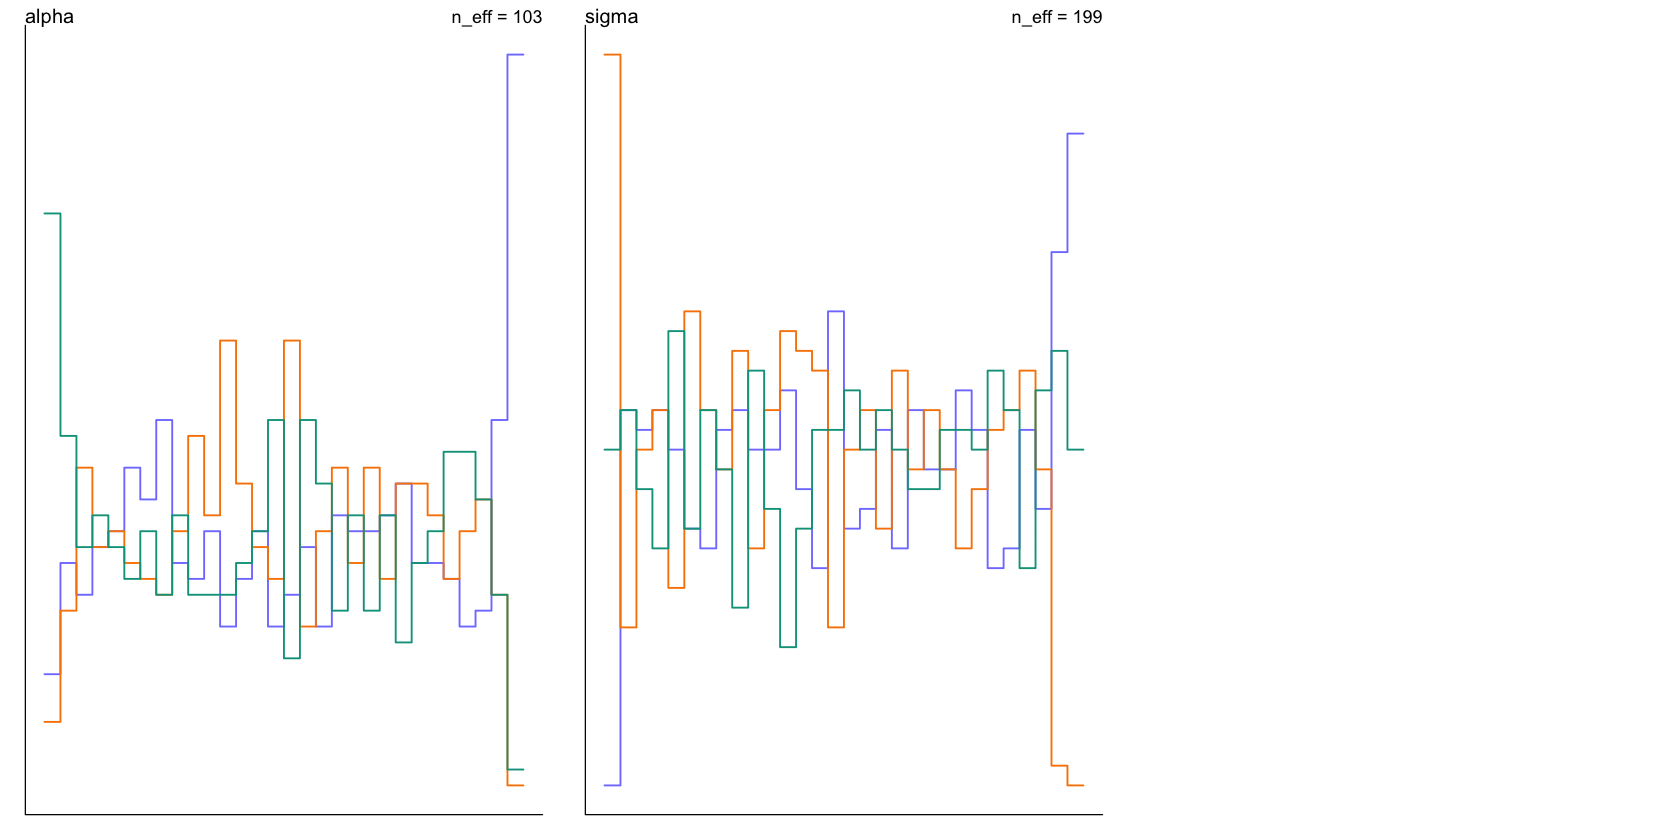

In [48]:
trankplot(m9.2)

In [49]:
set.seed(11)
m9.3 <- ulam(
    alist(
        y ~ dnorm(mu, sigma),
        mu <- alpha,
        alpha ~ dnorm(1, 10),
        sigma ~ dexp(1)
    ), data=list(y=y), chains=3
)
precis(m9.3)


SAMPLING FOR MODEL 'db8b93ccfa83872ce482c35ebed2c618' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 1.6e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.16 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:   1 / 1000 [  0%]  (Warmup)
Chain 1: Iteration: 100 / 1000 [ 10%]  (Warmup)
Chain 1: Iteration: 200 / 1000 [ 20%]  (Warmup)
Chain 1: Iteration: 300 / 1000 [ 30%]  (Warmup)
Chain 1: Iteration: 400 / 1000 [ 40%]  (Warmup)
Chain 1: Iteration: 500 / 1000 [ 50%]  (Warmup)
Chain 1: Iteration: 501 / 1000 [ 50%]  (Sampling)
Chain 1: Iteration: 600 / 1000 [ 60%]  (Sampling)
Chain 1: Iteration: 700 / 1000 [ 70%]  (Sampling)
Chain 1: Iteration: 800 / 1000 [ 80%]  (Sampling)
Chain 1: Iteration: 900 / 1000 [ 90%]  (Sampling)
Chain 1: Iteration: 1000 / 1000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.009356 seconds (Warm-up)
Chain 1:                0.007502 seconds (Sampling)
Chain 1:   

Warning message:
“Tail Effective Samples Size (ESS) is too low, indicating posterior variances and tail quantiles may be unreliable.
Running the chains for more iterations may help. See
http://mc-stan.org/misc/warnings.html#tail-ess”


,mean,sd,5.5%,94.5%,n_eff,Rhat4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
alpha,0.09368772,1.291687,-1.586733,2.282757,294.9239,1.005993
sigma,1.57242939,0.924527,0.693663,3.092426,254.8605,1.003729


[1] 1000
[1] 1
[1] 1000


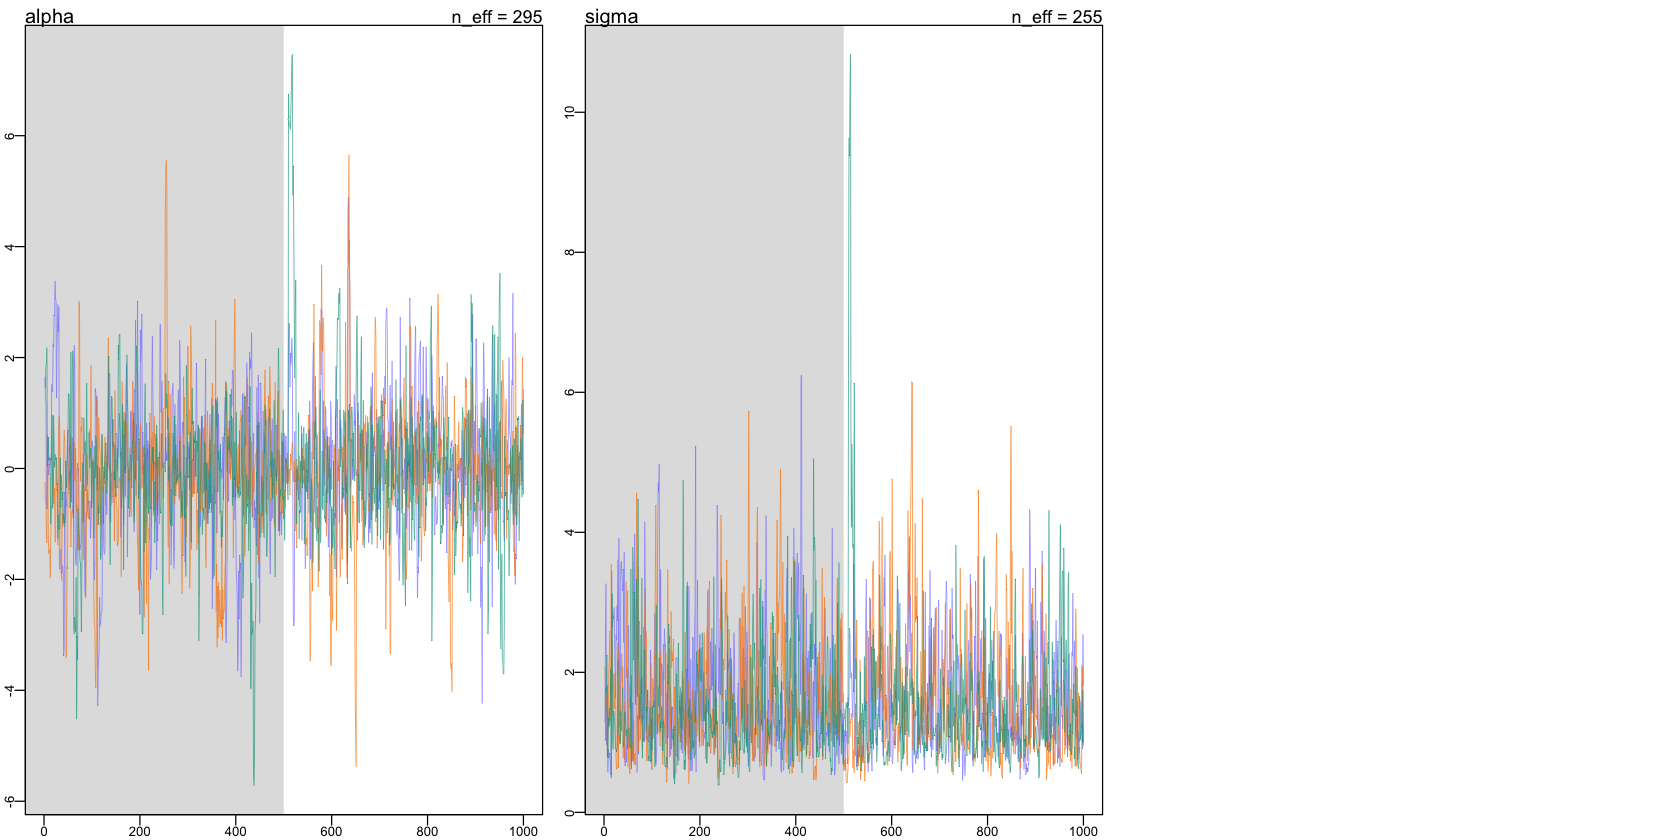

In [50]:
traceplot(m9.3)